In [1]:
import numpy as np
from scipy import ndimage
from scipy import misc
from scipy import linalg
import h5py as h5
import os

In [2]:
from pylab import *
import glob

import time
from progress import ProgressBar, query_yes_no

import mayavi.mlab as mlab

%matplotlib inline
%load_ext imayavi

rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

## Now open the output data file

In [3]:
infile = 'Drerio4.h5'
outfile = 'Drerio4angles.h5'

In [4]:
Fout = h5.File(outfile,'r')
eigvecdata = Fout['eigenvectors']
eigvaldata = Fout['eigenvalues']
intensitydata = Fout['intensity']

In [5]:
grid = np.array(Fout['centers'])

## Show the average intensity, just to make sure the data is reasonable

In [16]:
np.hstack((grid[0,[0,-1],0,0],grid[1,0,[0,-1],0],grid[2,0,0,[0,-1]]))

array([  16,  656,   16, 1200,   16, 2192])

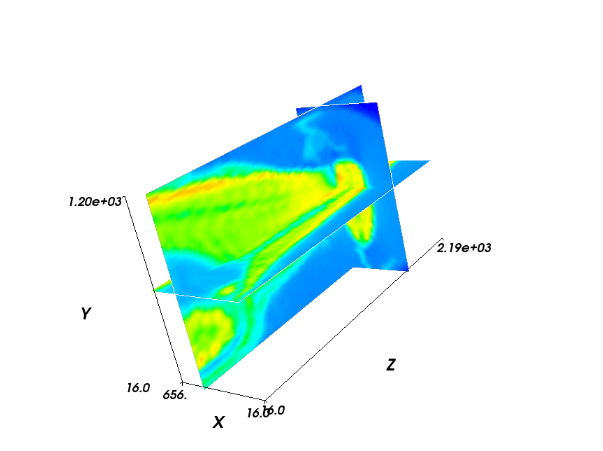

In [17]:
mlab.figure(bgcolor=(1,1,1), fgcolor=(0,0,0))

sf = mlab.pipeline.scalar_field(grid[0],grid[1],grid[2],np.array(intensitydata))
mlab.pipeline.image_plane_widget(sf, plane_orientation='x_axes',
                                 slice_index=int(intensitydata.shape[0]/2))
mlab.pipeline.image_plane_widget(sf, plane_orientation='y_axes',
                                 slice_index=int(intensitydata.shape[1]/2))
mlab.pipeline.image_plane_widget(sf, plane_orientation='z_axes',
                                 slice_index=int(intensitydata.shape[2]/2))

mlab.axes(extent=np.hstack((grid[0,[0,-1],0,0],grid[1,0,[0,-1],0],grid[2,0,0,[0,-1]])))

mlab.show(stop=True)

mayavi_show_inline(size=(800,600))

## Plot the vector field

In [8]:
np.squeeze(eigvecdata[1,0,:,:,:]).shape

(21, 38, 69)

Load in the first eigenvector data

In [9]:
V = np.squeeze(eigvecdata[:,0,:,:,:])

Flip the vector if the z direction is negative

In [10]:
negz = V[2,:,:,:] < 0
V[:,negz] = -V[:,negz]

In [11]:
V[:,10,20,30]

array([-0.67611611,  0.73603499,  0.03345877], dtype=float32)

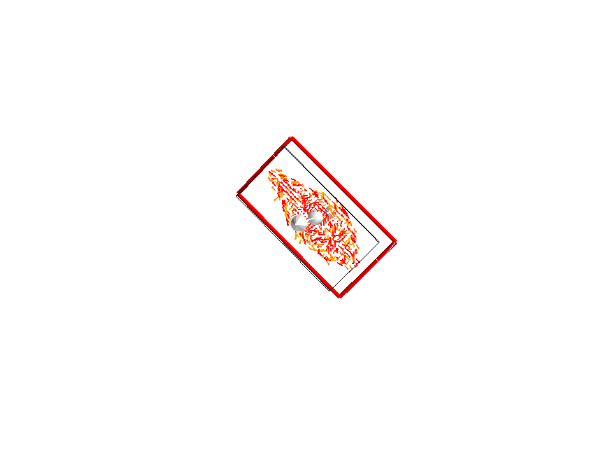

In [18]:
mlab.figure(bgcolor=(1,1,1), fgcolor=(0,0,0))

#sf = mlab.pipeline.scalar_field(grid[0],grid[1],grid[2],np.array(intensitydata))
#mlab.pipeline.image_plane_widget(sf, plane_orientation='z_axes', 
#                                slice_index=int(eigvecdata.shape[4]/2))

vf = mlab.pipeline.vector_field(grid[0],grid[1],grid[2],
              np.squeeze(V[0,:,:,:]),
              np.squeeze(V[1,:,:,:]),
              np.squeeze(V[2,:,:,:]),
                               scalars=np.abs(np.squeeze(eigvaldata[0,0,:,:,:])))
mlab.pipeline.vector_cut_plane(vf, mask_points=2, scale_factor=50, plane_orientation='z_axes')
mlab.outline()

mlab.show(stop=True)

mayavi_show_inline(size=(800,600))

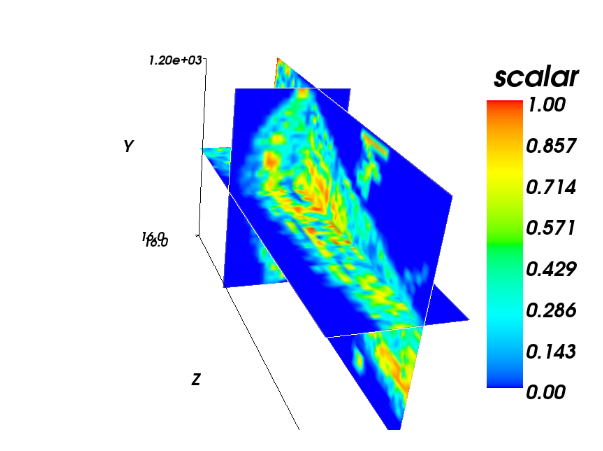

In [23]:
mlab.figure(bgcolor=(1,1,1), fgcolor=(0,0,0))

sf = mlab.pipeline.scalar_field(grid[0],grid[1],grid[2],np.squeeze(V[2,:,:,:]))
mlab.pipeline.image_plane_widget(sf, plane_orientation='x_axes',
                                 slice_index=int(intensitydata.shape[0]/2))
mlab.pipeline.image_plane_widget(sf, plane_orientation='y_axes',
                                 slice_index=int(intensitydata.shape[1]/2))
mlab.pipeline.image_plane_widget(sf, plane_orientation='z_axes',
                                 slice_index=int(intensitydata.shape[2]/2))

mlab.axes(extent=np.hstack((grid[0,[0,-1],0,0],grid[1,0,[0,-1],0],grid[2,0,0,[0,-1]])))

mlab.show(stop=True)

mayavi_show_inline(size=(800,600))

In [12]:
V2 = V
z = np.zeros((3,))
V2[:,V2[2,:,:] < 0.5] = z[:,np.newaxis]

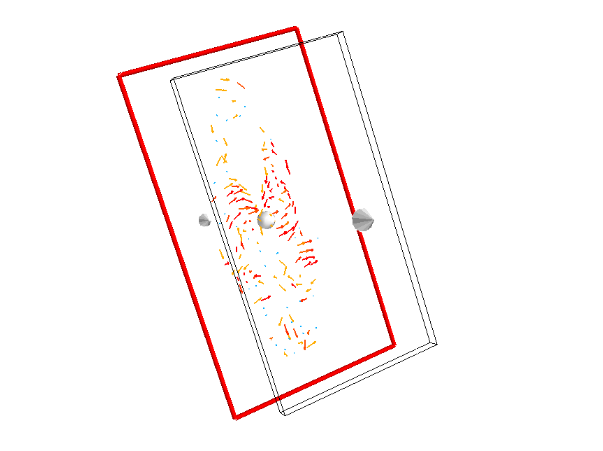

In [34]:
mlab.figure(bgcolor=(1,1,1), fgcolor=(0,0,0))

#sf = mlab.pipeline.scalar_field(grid[0],grid[1],grid[2],np.array(intensitydata))
#mlab.pipeline.image_plane_widget(sf, plane_orientation='z_axes', 
#                                slice_index=int(eigvecdata.shape[4]/2))

vf = mlab.pipeline.vector_field(grid[0],grid[1],grid[2],
              np.squeeze(V2[0,:,:,:]),
              np.squeeze(V2[1,:,:,:]),
              np.squeeze(V2[2,:,:,:]),
                               scalars=np.abs(np.squeeze(eigvaldata[0,0,:,:,:])))
mlab.pipeline.vector_cut_plane(vf, mask_points=2, scale_factor=50, plane_orientation='z_axes')
mlab.outline()

mlab.show(stop=True)

mayavi_show_inline(size=(800,600))

In [6]:
f = h5.File(infile,'a')
imgdata = f['image']
imgdata.shape

(690, 1235, 2237)

In [14]:
%matplotlib qt

I = np.array(imgdata[grid[0,9,0,0],:,:])
imshow(I.transpose(), cmap=cm.gray)
colorbar()

quiver(grid[1,9,:,:],grid[2,9,:,:],-np.squeeze(V[1,9,:,:]),np.squeeze(V[2,9,:,:]),color='r',scale=20)

plot(grid[1,9,18,30],grid[2,9,18,30],'y*',markersize=12)
show()

In [23]:
mpld3.display(fig)

In [20]:
grid[:,9,20,30]

array([304, 656, 976])